In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import astropy.units as u

import yt
import pysac.yt

import h5py

from astropy.modeling import models, fitting

In [3]:
ds = yt.load('/nocrypt/Slog_p240-0_A10_B005_00001.gdf')
type(ds)

yt : [WARNING  ] 2015-09-02 11:51:40,540 'field_units' was overridden by 'dataset_units/density_bg'
yt : [WARNING  ] 2015-09-02 11:51:40,544 'field_units' was overridden by 'dataset_units/density_pert'
yt : [WARNING  ] 2015-09-02 11:51:40,549 'field_units' was overridden by 'dataset_units/internal_energy_bg'
yt : [WARNING  ] 2015-09-02 11:51:40,553 'field_units' was overridden by 'dataset_units/internal_energy_pert'
yt : [WARNING  ] 2015-09-02 11:51:40,560 'field_units' was overridden by 'dataset_units/mag_field_x_bg'
yt : [WARNING  ] 2015-09-02 11:51:40,561 'field_units' was overridden by 'dataset_units/mag_field_x_pert'
yt : [WARNING  ] 2015-09-02 11:51:40,563 'field_units' was overridden by 'dataset_units/mag_field_y_bg'
yt : [WARNING  ] 2015-09-02 11:51:40,565 'field_units' was overridden by 'dataset_units/mag_field_y_pert'
yt : [WARNING  ] 2015-09-02 11:51:40,567 'field_units' was overridden by 'dataset_units/mag_field_z_bg'
yt : [WARNING  ] 2015-09-02 11:51:40,569 'field_units' w

pysac.yt.data_structures.SACGDFDataset

In [11]:
cg = ds.index.grids[0]

xmin = ds.domain_left_edge[0].convert_to_units('Mm')
xmax = ds.domain_right_edge[0].convert_to_units('Mm')
nx = ds.domain_dimensions[0]


f5 = h5py.File(ds.filename)
x_lin = f5['x'][0][:,63,0]
x_lin = x_lin*u.m
x_lin = x_lin.to(u.Mm)
#x_lin = np.linspace(xmin, xmax, nx)
bmag = cg['magnetic_field_strength'][:,63,0].to_astropy().to(u.mT)

gaussian = models.Gaussian1D()
bmag_fit = fitting.LevMarLSQFitter()(gaussian, x_lin, bmag)

fwhm = 2.*np.sqrt(2*np.log(2))*bmag_fit.stddev.value
fwhm = np.abs(fwhm) * u.Mm

fwtm = 2.*np.sqrt(2*np.log(10))*bmag_fit.stddev.value
fwtm = np.abs(fwtm) * u.Mm

u.Quantity([fwhm, fwtm]).to(u.km)

<Quantity [ 102.42726282, 186.68554027] km>

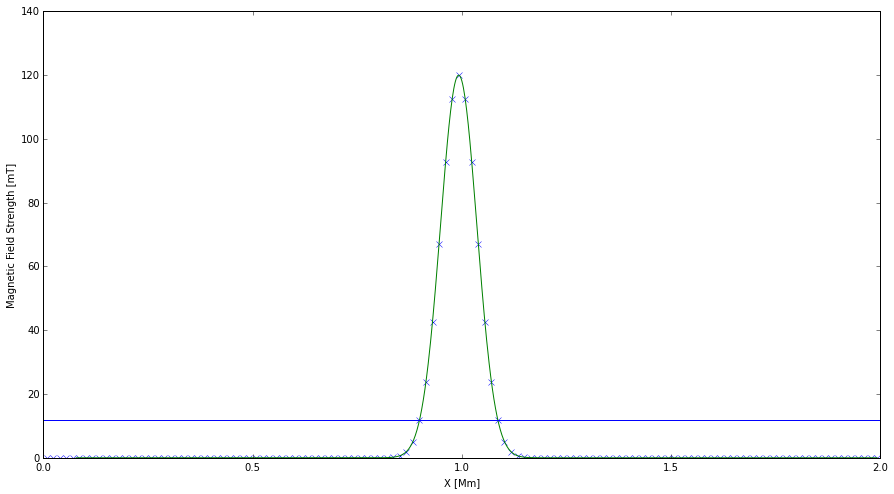

In [13]:
fig = plt.figure(figsize=(15,8))
plt.plot(x_lin, bmag.to(u.mT), 'x')
X = np.linspace(xmin, xmax, 1000)
plt.plot(X, bmag_fit(X.value))

plt.xlabel("X [{}]".format(x_lin.unit))
plt.ylabel("Magnetic Field Strength [{}]".format(bmag.unit))
plt.axhline(y=bmag_fit.amplitude.value/10)

In [15]:
np.save('mfe_x_coords_Mm.npy', x_lin.value)

In [16]:
np.save('mfe_bmag_x_mT.npy', bmag.value)

In [4]:
import numpy as np

from astropy.modeling import models, fitting
import astropy.units as u


x_lin = np.load('mfe_x_coords_Mm.npy')*u.Mm
bmag = np.load('mfe_bmag_x_mT.npy')*u.mT

gaussian = models.Gaussian1D()
bmag_fit = fitting.LevMarLSQFitter()(gaussian, x_lin, bmag)

fwhm = 2.*np.sqrt(2*np.log(2))*bmag_fit.stddev.value
fwhm = np.abs(fwhm) * u.Mm

fwtm = 2.*np.sqrt(2*np.log(10))*bmag_fit.stddev.value
fwtm = np.abs(fwtm) * u.Mm

u.Quantity([fwhm, fwtm]).to(u.km)

<Quantity [ 102.42726282, 186.68554027] km>